In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

Suport vector machines <br >
Take the cost function for the logistic regression:
$$J(\vec{\theta})=\frac{1}{m}\sum_{\alpha=1}^m \left[-y_{\alpha}\log(h(z_{\alpha}))-(1-y_{\alpha})\log(1-h(z_{\alpha}))\right]+\frac{\lambda}{2m}\sum_{i=1}^n\theta_i^2,\ \ \ z_{\alpha}=\vec{x}_{\alpha}\cdot\vec{\theta}$$
where
$$h(z)=\frac{1}{1+e^{-z}}.$$
We see that $J$ is composed of two parts, one which is present when $y=1$ and the other one present when $y=0$.<br><br>
We are going to propose a new cost function and replace the functions for similar but simplified fuctions:
\begin{align}
-\log(h(z))\rightarrow&\max(0,1-z)\\
-\log(1-h(z))\rightarrow&\max(0,z+1),
\end{align}
and remove the prefactor $1/m$ and replace the regularization parameter $\lambda$ for a new parameter $C$ that multiplies the first part of the cost function instead of the second one
$$J(\vec{\theta})=C\sum_{\alpha=1}^m \left[y_{\alpha}\max(0,1-z_{\alpha})+(1-y_{\alpha})\max(0,z_{\alpha}+1)\right]+\frac{1}{2}\sum_{i=1}^n\theta_i^2,\ \ \ z_{\alpha}=\vec{x}_{\alpha}\cdot\vec{\theta}.$$

In [58]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x = list(np.arange(-3,3,0.1))
y1 = [-np.log(sigmoid(i)) for i in x]
y0 = [-np.log(1-sigmoid(i)) for i in x]
r0 = [max(0,i+1) for i in x]
r1 = [max(0,1-i) for i in x]
lsig_df = pd.DataFrame({'x':x,'y1':y1,'r1':r1,'y0':y0,'r0':r0})

Text(0, 0.5, '$f(z)$')

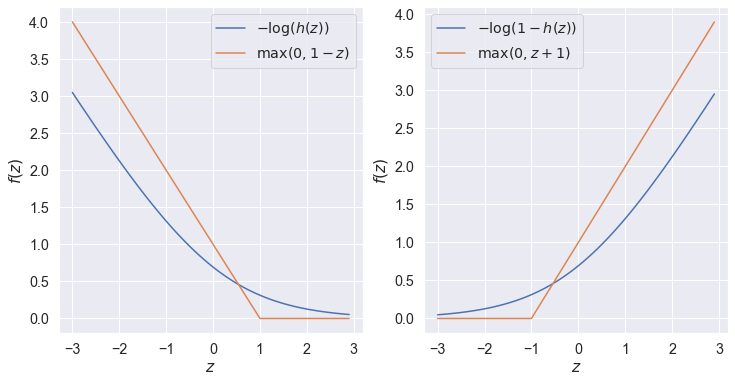

In [60]:
fig0, ax = plt.subplots(1,2,figsize=(12, 6))
sns.lineplot(data=lsig_df, ax=ax[0], x='x', y='y1',label=r'$-\log(h(z))$')
sns.lineplot(data=lsig_df, ax=ax[0], x='x', y='r1',label=r'$\max(0,1-z)$')
sns.lineplot(data=lsig_df, ax=ax[1], x='x', y='y0',label=r'$-\log(1-h(z))$')
sns.lineplot(data=lsig_df, ax=ax[1], x='x', y='r0',label=r'$\max(0,z+1)$')
ax[0].set_xlabel(r'$z$')
ax[1].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$f(z)$')
ax[1].set_ylabel(r'$f(z)$')

Now we want to train the SVM for the classification problem by finding the $\theta$ that minimize $J$, and we can see that

| J | z | y |
| :-: | :-: | :-: |
| 0 | >1 | 1 |
| >0 | <1 | 1 |
| 0 | <-1 | 0 |
| >0 | >-1 | 0 |

which means that $J$ is minimized when $z\geq1$ and $y=1$ or when $z\leq-1$ and $y=0$.  